# **FAKE NEWS DETECTION**

Trong thời đại công nghệ thông tin phát triển mạnh mẽ, việc lan truyền thông tin trên Internet trở nên phổ biến và nhanh chóng. Tuy nhiên, điều này cũng kéo theo một vấn nạn nghiêm trọng – đó là sự xuất hiện của các tin tức giả mạo (Fake News). Các thông tin sai lệch có thể gây ra hậu quả tiêu cực đối với xã hội, chính trị, kinh tế và niềm tin của người dân. Vì vậy, việc phát triển một hệ thống có khả năng tự động phát hiện và phân loại tin giả là một nhu cầu cấp thiết.
Đề tài 'Phát hiện tin giả bằng xử lý ngôn ngữ tự nhiên' nhằm mục đích nghiên cứu và áp dụng các kỹ thuật của Natural Language Processing (NLP) kết hợp với các mô hình học máy (Machine Learning) để xây dựng một mô hình có khả năng nhận diện tin thật và tin giả một cách chính xác.

# DOWNLOAD DATASET

**Giới thiệu Dataset**

Nhóm sử dụng Fake News Detection Dataset từ Kaggle, được cung cấp bởi Bhavik Jikadara và được cập nhật lần cuối cách đây 2 năm. Dataset này có hơn 10.000 lượt tải xuống và nhận được nhiều đánh giá tích cực từ cộng đồng, chứng tỏ mức độ tin cậy cũng như tính phổ biến trong lĩnh vực nghiên cứu phát hiện tin giả. Mặc dù đây không phải dataset của một cuộc thi, nhưng chất lượng dữ liệu và mức độ sử dụng rộng rãi khiến nó trở thành lựa chọn phù hợp cho bài toán phân loại fake news. https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection

**Lý do chọn dataset**
1. Dataset có quy mô đủ lớn và đa dạng để huấn luyện mô hình phân loại văn bản.
2. Được cộng đồng đánh giá cao, giúp đảm bảo chất lượng và tính thực tiễn.
3. Cấu trúc dữ liệu rõ ràng, dễ sử dụng cho các mô hình machine learning và deep learning.
4. Phù hợp trực tiếp với mục tiêu của nhóm: phân loại tin thật – tin giả.

**Bối cảnh bài toán:**
- Phát hiện tin giả (Fake News Detection) là một bài toán thuộc nhánh Text Classification trong xử lý ngôn ngữ tự nhiên (NLP). Nhiệm vụ chính là phân tích nội dung bài báo hoặc đoạn văn để xác định tính xác thực của thông tin. Việc lựa chọn dataset này giúp nhóm triển khai đầy đủ quy trình: tiền xử lý văn bản, biểu diễn dữ liệu, huấn luyện mô hình và đánh giá hiệu quả.

In [1]:
import pandas as pd
from tqdm import tqdm
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Set up Kaggle API in Colab

Follow these steps to enable Kaggle dataset downloads in your Colab environment:

1.  **Get your Kaggle API Token:**
    *   Go to [Kaggle.com](https://www.kaggle.com/), log in, and navigate to your user profile.
    *   Click on 'Account'.
    *   Scroll down to the 'API' section and click 'Create New API Token'. This will download a `kaggle.json` file.
2.  **Upload `kaggle.json` to Colab:**
    *   Run the code cell below, and a file upload dialog will appear. Upload the `kaggle.json` file you just downloaded.

In [2]:
# Install the Kaggle API client
!pip install -q kaggle
# Create a directory for Kaggle configuration
!mkdir -p ~/.kaggle
# Upload your Kaggle API key (kaggle.json)
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anhayng","key":"272a2db81608446b482632e8cbb25506"}'}

In [3]:
# Move the kaggle.json file to the .kaggle directory and set permissions
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Tải dataset từ kaggle

Dataset nhóm sẽ dùng là https://www.kaggle.com/datasets/algord/fake-news

In [4]:
# Download the dataset from Kaggle
!kaggle datasets download algord/fake-news
# Unzip the dataset
# The dataset typically gets downloaded as a zip file in the current working directory
!unzip -q fake-news -d fake-news
print("Dataset downloaded and unzipped successfully!")

Dataset URL: https://www.kaggle.com/datasets/algord/fake-news
License(s): CC0-1.0
  0% 0.00/1.68M [00:00<?, ?B/s]
100% 1.68M/1.68M [00:00<00:00, 787MB/s]
Dataset downloaded and unzipped successfully!


## Load the dataset

In [5]:
df = pd.read_csv("/content/fake-news/FakeNewsNet.csv")
print("Đã tải bộ dữ liệu đầy đủ từ file CSV.")

Đã tải bộ dữ liệu đầy đủ từ file CSV.


In [6]:
df.shape

(23196, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


In [8]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


Xem thử cột title có text dài và ngắn không

In [9]:
df[df['title'].str.len() < 280]['title'].value_counts()

,count
title,
Connecting People Through News,20
Female First Forum,13
"Outlook, Office, Skype, Bing, Breaking News, and Latest Videos",13
- USweekly,12
A Complete Timeline of Selena Gomez and Justin Bieber's Relationship,11
...,...
Why Doesn't Prince William Wear a Wedding Ring?,1
15 Amazing Lightweight Foundation Alternatives For A Breezy Summer Season — PHOTOS,1
Selena Gomez Justin Bieber Best Kisser Ever,1


In [10]:
df[df['title'].str.len() >= 280]['title'].value_counts()

,count
title,
or Degrading Treatment of Punishment Text of International Covenant on Civil and Political Rights Text of Geneva Convention relative to the Treatment of Prisoners of War Text of Geneva Convention relative to the Protection of Civilian Persons in Time of War Text of Universal Declaration of Human Rights Jay Bybee assistant attorney general,1


# Data preprocessing

## Xử lí dữ liệu thiếu

In [11]:
df.isnull().sum()

,0
title,0
news_url,330
source_domain,330
tweet_num,0
real,0


In [12]:
# Drop the "news_url"
df = df.drop("news_url", axis =1)

In [13]:
# Handle the missing values in source_domain. replace with "Unkown"
df['source_domain'] = df['source_domain'].fillna("Unknown")

In [14]:
df

,title,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,www.zerchoo.com,38,1
...,...,...,...,...
23191,Pippa Middleton wedding: In case you missed it...,www.express.co.uk,52,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com,7,0
23193,Jessica Chastain Recalls the Moment Her Mother...,www.justjared.com,26,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com,24,0


## Hàm tiền xử lý: chữ thường, loại punctuation, bỏ stopwords

Định nghĩa các từ stop words

Mục đích: Loại bỏ các từ phổ biến, không mang nhiều ý nghĩa phân loại (ví dụ: 'a', 'the', 'is', 'have',...). Điều này giúp giảm nhiễu và tập trung vào các từ quan trọng hơn.

In [15]:
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't",
    'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn',
    "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't",
    'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't",
    'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
])

In [16]:
def preprocess_text(text_data):
    preprocessed_text = []
    for sentence in tqdm(text_data, desc="Đang xử lý văn bản"):
        # Loại bỏ dấu câu
        sentence = re.sub(r'[^\w\s]', '', str(sentence))
        # Chuyển thành chữ thường và loại bỏ từ dừng (stopwords)
        clean_sentence = ' '.join(token.lower() for token in sentence.split() if token.lower() not in stop_words)
        preprocessed_text.append(clean_sentence)
    return preprocessed_text

**Ý nghĩa của hàm:**
1. Loại bỏ dấu câu (re.sub(r'[^\w\s]', '', str(sentence))).
2. Chuyển về chữ thường (token.lower()).
3. Loại bỏ stopwords.

Chuẩn hóa văn bản để mô hình có thể học hiệu quả hơn.

In [17]:
df["combined"] = df["title"].fillna("") + " " + df["source_domain"].fillna("")
preprocess_text(df["combined"])

Đang xử lý văn bản: 100%|██████████| 23196/23196 [00:00<00:00, 101089.72it/s]


['kandi burruss explodes rape accusation real housewives atlanta reunion video toofabcom',
 'peoples choice awards 2018 best red carpet looks wwwtodaycom',
 'sophia bush sends sweet birthday message one tree hill costar hilarie burton breyton 4eva wwwetonlinecom',
 'colombian singer maluma sparks rumours inappropriate relationship aunt wwwdailymailcouk',
 'gossip girl 10 years later upper east siders shocked world changed pop culture forever wwwzerchoocom',
 'gwen stefani got dumped blake shelton jealousy drama exclusive wwwintouchweeklycom',
 'broward county sheriff fired lying parkland yournewswirecom',
 'amber rose shuts french montana dating rumors calls rapper bruvaaa wwwetonlinecom',
 'mindy kaling makes first postbaby appearance disneyland wrinkle time costars wwwaolcom',
 'katharine mcphee butchers tony nominations drinking www98onlinecom',
 'wags miami stars ashley nicole roberts philip wheeler married wwwusmagazinecom',
 'mel gibson hollywood pedophiles nowhere left hide your

Hàm này cần được gọi để áp dụng quá trình làm sạch cho cột văn bản (ví dụ: df['text'] = preprocess_text(df['text'])) trước khi vector hóa.

# Chuẩn bị data cho training

## Chia tập train và tập test

Chia dữ liệu thành tập huấn luyện (75%) và tập kiểm tra (25%). Mục đích: Đảm bảo mô hình được đánh giá trên dữ liệu chưa từng thấy để kiểm tra khả năng khái quát hóa.

In [18]:
X = df["title"]
y = df["real"]

In [19]:
# Divide the dataset into Train and Test
X_train , X_test ,y_train ,y_test = train_test_split(
    X,y, test_size=0.25 , random_state =42, stratify= y
)

In [20]:
X_train.shape

(17397,)

## Xử lí mất cân bằng lớp

In [21]:
df['real'].value_counts()

,count
real,
1,17441
0,5755


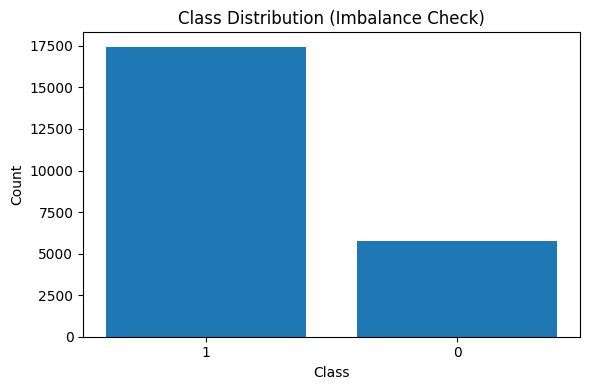

In [22]:
import matplotlib.pyplot as plt
counts = df['real'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution (Imbalance Check)")
plt.tight_layout()
plt.show()

Tính toán class_weight

In [23]:
import numpy as np
from sklearn.utils import class_weight
class_weights_vals = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights_vals))
print("Class weights:", class_weights_dict)

Class weights: {0: np.float64(2.015407784986098), 1: np.float64(0.6649720969344851)}


## Vector hóa dữ liệu (TF-IDF)

Mục đích: Chuyển đổi dữ liệu văn bản thành định dạng số (vector) mà mô hình học máy có thể xử lý được. TF-IDF (Term Frequency-Inverse Document Frequency) đánh giá mức độ quan trọng của một từ trong tài liệu so với toàn bộ tập dữ liệu, giúp các từ đặc trưng cho tin giả/tin thật có trọng số cao hơn.

In [24]:
vectorization = TfidfVectorizer()
X_train_tfidf = vectorization.fit_transform(X_train)
X_test_tfidf = vectorization.transform(X_test)

# Huấn luyện mô hình

## Hồi quy Logistic (Logistic Regression)

Hồi quy Logistic là một thuật toán học máy (Machine Learning) được sử dụng để giải quyết các bài toán phân loại (Classification), đặc biệt là phân loại nhị phân (có hai lớp đầu ra, ví dụ: Có/Không, 0/1).
- Bản chất: LR không phải là một mô hình hồi quy (dự đoán giá trị liên tục) mà là một mô hình phân loại tuyến tính. Nó sử dụng hàm Sigmoid để ánh xạ đầu ra của một phép kết hợp tuyến tính các đầu vào về một giá trị xác suất nằm giữa 0 và 1.
- Nguyên tắc hoạt động: Nếu xác suất dự đoán lớn hơn ngưỡng $\text{0.5}$ (hoặc ngưỡng tùy chỉnh), mô hình phân loại dữ liệu vào lớp 1; ngược lại, phân loại vào lớp 0.

LR trong bài toán Phát hiện Tin giả
Trong dự án này, Hồi quy Logistic đóng vai trò là một trong những mô hình phân loại chính:

Đầu vào: Vector TF-IDF (biểu diễn số hóa của các bài báo).

Đầu ra: Phân loại bài báo thành:

- Lớp 0 (Tin giả - FAKE)

- Lớp 1 (Tin thật - REAL)

In [25]:
lr_model = LogisticRegression(
    random_state=42,
    solver='saga',
    penalty='l2',
    max_iter=1000,
    n_jobs=-1,
    class_weight = class_weights_dict
)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight={0: np.float64(2.015407784986098),
                                 1: np.float64(0.6649720969344851)},
                   max_iter=1000, n_jobs=-1, random_state=42, solver='saga')

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Dự đoán trên tập train và test
y_train_pred_lr = lr_model.predict(X_train_tfidf)
y_test_pred_lr = lr_model.predict(X_test_tfidf)
# 1. Accuracy
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr  = accuracy_score(y_test,  y_test_pred_lr)
# 2. Precision, Recall, F1-score
# - macro: tính trung bình không trọng số (phù hợp khi các lớp cân bằng)
# - weighted: tính trung bình có trọng số theo số lượng mẫu mỗi lớp
# - micro: tương đương accuracy trong bài toán đa lớp
train_precision_lr = precision_score(y_train, y_train_pred_lr, average='weighted')
train_recall_lr    = recall_score(y_train, y_train_pred_lr, average='weighted')
train_f1_lr        = f1_score(y_train, y_train_pred_lr, average='weighted')
test_precision_lr  = precision_score(y_test, y_test_pred_lr, average='weighted')
test_recall_lr     = recall_score(y_test, y_test_pred_lr, average='weighted')
test_f1_lr         = f1_score(y_test, y_test_pred_lr, average='weighted')
# In kết quả đẹp
print("=== ĐÁNH GIÁ MÔ HÌNH LOGISTIC REGRESSION ===")
print(f"{'':<15} {'Train':>12} {'Test':>12}")
print(f"{'Accuracy':<15} {train_accuracy_lr:>12.4f} {test_accuracy_lr:>12.4f}")
print(f"{'Precision':<15} {train_precision_lr:>12.4f} {test_precision_lr:>12.4f}")
print(f"{'Recall':<15} {train_recall_lr:>12.4f} {test_recall_lr:>12.4f}")
print(f"{'F1-score':<15} {train_f1_lr:>12.4f} {test_f1_lr:>12.4f}")
print("\n=== Classification Report trên tập Test ===")
print(classification_report(y_test, y_test_pred_lr))

=== ĐÁNH GIÁ MÔ HÌNH LOGISTIC REGRESSION ===
                       Train         Test
Accuracy              0.8856       0.8257
Precision             0.8975       0.8376
Recall                0.8856       0.8257
F1-score              0.8889       0.8300

=== Classification Report trên tập Test ===
              precision    recall  f1-score   support

           0       0.63      0.73      0.68      1439
           1       0.91      0.86      0.88      4360

    accuracy                           0.83      5799
   macro avg       0.77      0.80      0.78      5799
weighted avg       0.84      0.83      0.83      5799



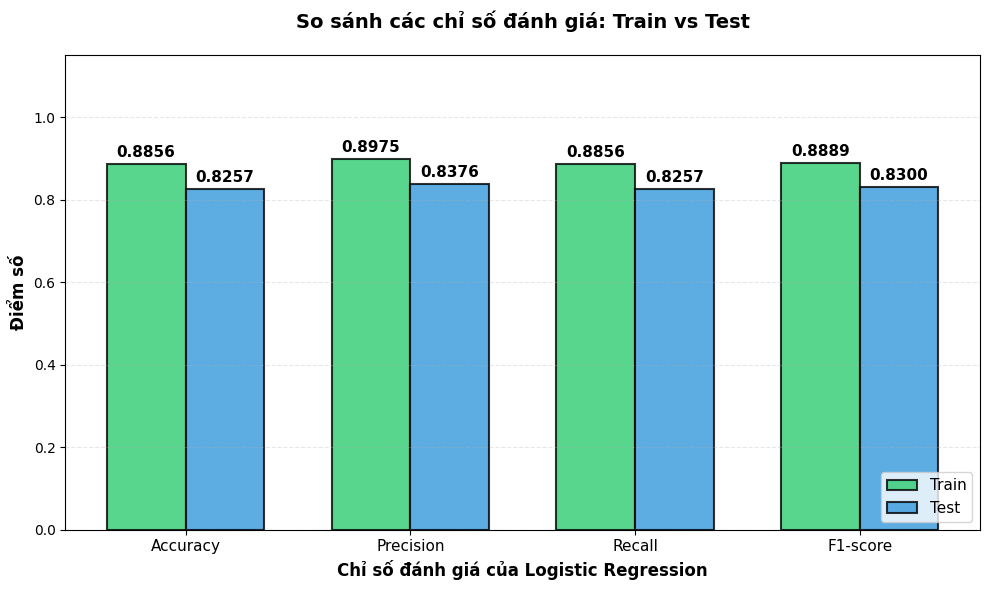

In [27]:
import matplotlib.pyplot as plt
import numpy as np
# Dữ liệu từ kết quả đánh giá
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_scores = [train_accuracy_lr, train_precision_lr, train_recall_lr, train_f1_lr]
test_scores = [test_accuracy_lr, test_precision_lr, test_recall_lr, test_f1_lr]
# Tạo biểu đồ cột
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.35
bars1 = ax.bar(x - width/2, train_scores, width, label='Train',
                color='#2ecc71', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, test_scores, width, label='Test',
                color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.5)
# Thêm giá trị lên đầu cột
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
# Tùy chỉnh biểu đồ
ax.set_xlabel('Chỉ số đánh giá của Logistic Regression', fontsize=12, fontweight='bold')
ax.set_ylabel('Điểm số', fontsize=12, fontweight='bold')
ax.set_title('So sánh các chỉ số đánh giá: Train vs Test',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.set_ylim([0, 1.15])
ax.legend(fontsize=11, loc='lower right')
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

Logistic Regression là một mô hình phân loại tuyến tính đơn giản nhưng hiệu quả. Kết quả cho thấy mô hình này hoạt động rất tốt trên tập dữ liệu đã được TF-IDF vector hóa.

## Cây Quyết định (Decision Tree Classifier)

Cây Quyết định là một thuật toán học máy thuộc nhóm phân loại phi tuyến tính và là một trong những thuật toán dễ hiểu, dễ trực quan hóa nhất.

- Bản chất: Mô hình được xây dựng dưới dạng một cấu trúc cây (tree-like structure), nơi mỗi nút bên trong đại diện cho một thuộc tính (feature) của dữ liệu, mỗi nhánh đại diện cho một quy tắc quyết định, và mỗi nút lá đại diện cho kết quả phân loại cuối cùng.

- Nguyên tắc hoạt động: Bắt đầu từ nút gốc, dữ liệu được lọc qua các nút quyết định theo các quy tắc cho đến khi đạt đến nút lá, nơi đưa ra kết quả phân loại cuối cùng

Cây Quyết định cũng là một mô hình phân loại được sử dụng để so sánh hiệu suất với LR:

- Đầu vào: Vector TF-IDF (tương tự LR).

- Đầu ra: Phân loại bài báo thành Tin giả (0) hoặc Tin thật (1).

In [28]:
dt_model = DecisionTreeClassifier(
    random_state=42,
    class_weight = class_weights_dict
)
dt_model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(class_weight={0: np.float64(2.015407784986098),
                                     1: np.float64(0.6649720969344851)},
                       random_state=42)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Dự đoán trên tập train và test
y_train_pred_dt = dt_model.predict(X_train_tfidf)
y_test_pred_dt = dt_model.predict(X_test_tfidf)
# 1. Accuracy
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt  = accuracy_score(y_test,  y_test_pred_dt)
# 2. Precision, Recall, F1-score
# - macro: tính trung bình không trọng số (phù hợp khi các lớp cân bằng)
# - weighted: tính trung bình có trọng số theo số lượng mẫu mỗi lớp
# - micro: tương đương accuracy trong bài toán đa lớp
train_precision_dt = precision_score(y_train, y_train_pred_dt, average='weighted')
train_recall_dt    = recall_score(y_train, y_train_pred_dt, average='weighted')
train_f1_dt        = f1_score(y_train, y_train_pred_dt, average='weighted')
test_precision_dt  = precision_score(y_test, y_test_pred_dt, average='weighted')
test_recall_dt     = recall_score(y_test, y_test_pred_dt, average='weighted')
test_f1_dt         = f1_score(y_test, y_test_pred_dt, average='weighted')
# In kết quả đẹp
print("=== ĐÁNH GIÁ MÔ HÌNH DECISION TREE ===")
print(f"{'':<15} {'Train':>12} {'Test':>12}")
print(f"{'Accuracy':<15} {train_accuracy_dt:>12.4f} {test_accuracy_dt:>12.4f}")
print(f"{'Precision':<15} {train_precision_dt:>12.4f} {test_precision_dt:>12.4f}")
print(f"{'Recall':<15} {train_recall_dt:>12.4f} {test_recall_dt:>12.4f}")
print(f"{'F1-score':<15} {train_f1_dt:>12.4f} {test_f1_dt:>12.4f}")
print("\n=== Classification Report trên tập Test ===")
print(classification_report(y_test, y_test_pred_dt))

=== ĐÁNH GIÁ MÔ HÌNH DECISION TREE ===
                       Train         Test
Accuracy              0.9937       0.7748
Precision             0.9939       0.7870
Recall                0.9937       0.7748
F1-score              0.9938       0.7798

=== Classification Report trên tập Test ===
              precision    recall  f1-score   support

           0       0.54      0.62      0.58      1439
           1       0.87      0.83      0.85      4360

    accuracy                           0.77      5799
   macro avg       0.70      0.72      0.71      5799
weighted avg       0.79      0.77      0.78      5799



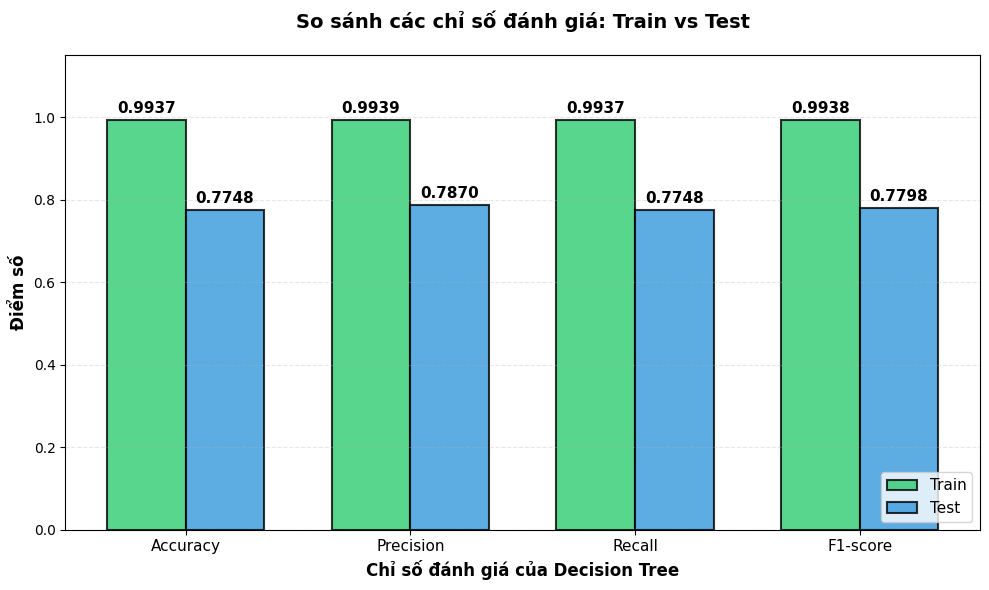

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu từ kết quả đánh giá
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_scores_dt = [train_accuracy_dt, train_precision_dt, train_recall_dt, train_f1_dt]
test_scores_dt = [test_accuracy_dt, test_precision_dt, test_recall_dt, test_f1_dt]

# Tạo biểu đồ cột
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(metrics))
width = 0.35

bars1 = ax.bar(x - width/2, train_scores_dt, width, label='Train',
                color='#2ecc71', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, test_scores_dt, width, label='Test',
                color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.5)

# Thêm giá trị lên đầu cột
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Tùy chỉnh biểu đồ
ax.set_xlabel('Chỉ số đánh giá của Decision Tree', fontsize=12, fontweight='bold')
ax.set_ylabel('Điểm số', fontsize=12, fontweight='bold')
ax.set_title('So sánh các chỉ số đánh giá: Train vs Test',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.set_ylim([0, 1.15])
ax.legend(fontsize=11, loc='lower right')
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()

Decision Tree học các quy tắc phân loại dựa trên trọng số TF-IDF. Mặc dù đạt độ chính xác 100% trên tập huấn luyện (cho thấy khả năng bị overfitting - học thuộc lòng dữ liệu), nhưng độ chính xác trên tập kiểm tra (0.9948) vẫn rất cao, cao hơn cả Logistic Regression.

Confusion matrix, without normalization


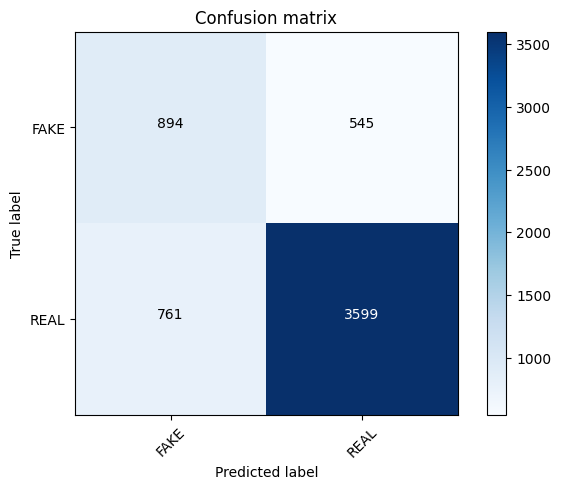

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Ma trận nhầm lẫn cho Cây Quyết định
cm = confusion_matrix(y_test, dt_model.predict(X_test_tfidf))
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

Mục đích: Đánh giá sâu hơn độ chính xác. Với Accuracy rất cao, ma trận này giúp xác nhận mô hình gần như không mắc lỗi phân loại.

## Random Forest

Random Forest là một thuật toán học máy (Machine Learning) thuộc nhóm Ensemble Learning, dùng cho:
Classification (phân loại)
Regression (hồi quy)

Nó hoạt động bằng cách:
Tạo ra nhiều cây quyết định (Decision Trees)

Mỗi cây được huấn luyện trên dữ liệu ngẫu nhiên + features ngẫu nhiên (gọi là Bagging + Random Subspace).

Mỗi cây sẽ đưa ra dự đoán riêng
Classification → mỗi cây vote một lớp
Regression → lấy trung bình dự đoán

Kết quả cuối cùng = tổng hợp trí tuệ cả "rừng cây"
→ Ổn định, giảm overfitting, độ chính xác cao.

In [32]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    max_features="sqrt",
    min_samples_split=5,
    random_state=42,
    class_weight = class_weights_dict
)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight={0: np.float64(2.015407784986098),
                                     1: np.float64(0.6649720969344851)},
                       min_samples_split=5, n_estimators=200, random_state=42)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Dự đoán trên tập train và test
y_train_pred_rf = model.predict(X_train_tfidf)
y_test_pred_rf = model.predict(X_test_tfidf)
# 1. Accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf  = accuracy_score(y_test,  y_test_pred_rf)
# 2. Precision, Recall, F1-score
# - macro: tính trung bình không trọng số (phù hợp khi các lớp cân bằng)
# - weighted: tính trung bình có trọng số theo số lượng mẫu mỗi lớp
# - micro: tương đương accuracy trong bài toán đa lớp
train_precision_rf = precision_score(y_train, y_train_pred_rf, average='weighted')
train_recall_rf    = recall_score(y_train, y_train_pred_rf, average='weighted')
train_f1_rf        = f1_score(y_train, y_train_pred_rf, average='weighted')
test_precision_rf  = precision_score(y_test, y_test_pred_rf, average='weighted')
test_recall_rf     = recall_score(y_test, y_test_pred_rf, average='weighted')
test_f1_rf         = f1_score(y_test, y_test_pred_rf, average='weighted')
# In kết quả đẹp
print("=== ĐÁNH GIÁ MÔ HÌNH RANDOM FOREST ===")
print(f"{'':<15} {'Train':>12} {'Test':>12}")
print(f"{'Accuracy':<15} {train_accuracy_rf:>12.4f} {test_accuracy_rf:>12.4f}")
print(f"{'Precision':<15} {train_precision_rf:>12.4f} {test_precision_rf:>12.4f}")
print(f"{'Recall':<15} {train_recall_rf:>12.4f} {test_recall_rf:>12.4f}")
print(f"{'F1-score':<15} {train_f1_rf:>12.4f} {test_f1_rf:>12.4f}")
print("\n=== Classification Report trên tập Test ===")
print(classification_report(y_test, y_test_pred_rf))

=== ĐÁNH GIÁ MÔ HÌNH RANDOM FOREST ===
                       Train         Test
Accuracy              0.9939       0.8358
Precision             0.9940       0.8285
Recall                0.9939       0.8358
F1-score              0.9939       0.8300

=== Classification Report trên tập Test ===
              precision    recall  f1-score   support

           0       0.71      0.58      0.64      1439
           1       0.87      0.92      0.89      4360

    accuracy                           0.84      5799
   macro avg       0.79      0.75      0.76      5799
weighted avg       0.83      0.84      0.83      5799



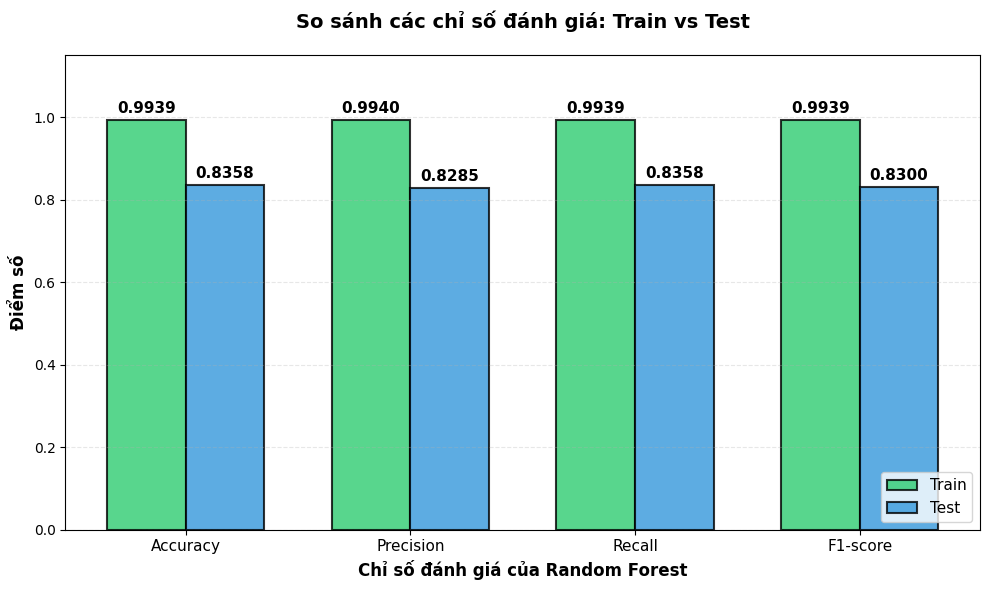

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu từ kết quả đánh giá
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_scores_rf = [train_accuracy_rf, train_precision_rf, train_recall_rf, train_f1_rf]
test_scores_rf = [test_accuracy_rf, test_precision_rf, test_recall_rf, test_f1_rf]

# Tạo biểu đồ cột
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(metrics))
width = 0.35

bars1 = ax.bar(x - width/2, train_scores_rf, width, label='Train',
                color='#2ecc71', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, test_scores_rf, width, label='Test',
                color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.5)

# Thêm giá trị lên đầu cột
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Tùy chỉnh biểu đồ
ax.set_xlabel('Chỉ số đánh giá của Random Forest', fontsize=12, fontweight='bold')
ax.set_ylabel('Điểm số', fontsize=12, fontweight='bold')
ax.set_title('So sánh các chỉ số đánh giá: Train vs Test',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.set_ylim([0, 1.15])
ax.legend(fontsize=11, loc='lower right')
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)

plt.tight_layout()
plt.show()

## KNN

KNN, viết tắt của K-Nearest Neighbors (K láng giềng gần nhất), là một thuật toán học máy giám sát (Supervised Learning) phi tham số (non-parametric), chủ yếu được sử dụng cho các bài toán phân loại (classification) và hồi quy (regression).

KNN hoạt động dựa trên giả định rằng các điểm dữ liệu có đặc điểm tương tự nhau thì có khả năng nằm gần nhau trong không gian đặc trưng (feature space).
Cơ chế hoạt động:
Lưu trữ: KNN không học một mô hình riêng biệt trong quá trình huấn luyện, mà chỉ đơn giản là lưu trữ toàn bộ tập dữ liệu huấn luyện và các nhãn (labels) tương ứng.
Dự đoán: Khi nhận một điểm dữ liệu mới cần phân loại (query point):
* Tính toán khoảng cách (thường là khoảng cách Euclidean) từ điểm mới này đến mọi điểm dữ liệu trong tập huấn luyện.
* Xác định K điểm gần nhất (K láng giềng) với điểm mới đó.Nó sử dụng nguyên tắc bỏ phiếu đa số (majority vote) từ nhãn của K láng giềng này để gán nhãn cho điểm mới.

Ví dụ: Nếu $K=5$, và trong 5 láng giềng gần nhất, có 3 láng giềng thuộc Lớp A và 2 láng giềng thuộc Lớp B, thì điểm mới sẽ được phân loại là Lớp A.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(
    n_neighbors=5,
    )
classifier.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Dự đoán trên tập train và test
y_train_pred_knn = classifier.predict(X_train_tfidf)
y_test_pred_knn = classifier.predict(X_test_tfidf)
# 1. Accuracy
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
test_accuracy_knn  = accuracy_score(y_test,  y_test_pred_knn)
# 2. Precision, Recall, F1-score
# - macro: tính trung bình không trọng số (phù hợp khi các lớp cân bằng)
# - weighted: tính trung bình có trọng số theo số lượng mẫu mỗi lớp
# - micro: tương đương accuracy trong bài toán đa lớp
train_precision_knn = precision_score(y_train, y_train_pred_knn, average='weighted')
train_recall_knn    = recall_score(y_train, y_train_pred_knn, average='weighted')
train_f1_knn        = f1_score(y_train, y_train_pred_knn, average='weighted')
test_precision_knn  = precision_score(y_test, y_test_pred_knn, average='weighted')
test_recall_knn     = recall_score(y_test, y_test_pred_knn, average='weighted')
test_f1_knn         = f1_score(y_test, y_test_pred_knn, average='weighted')
# In kết quả đẹp
print("=== ĐÁNH GIÁ MÔ HÌNH RANDOM FOREST ===")
print(f"{'':<15} {'Train':>12} {'Test':>12}")
print(f"{'Accuracy':<15} {train_accuracy_knn:>12.4f} {test_accuracy_knn:>12.4f}")
print(f"{'Precision':<15} {train_precision_knn:>12.4f} {test_precision_knn:>12.4f}")
print(f"{'Recall':<15} {train_recall_knn:>12.4f} {test_recall_knn:>12.4f}")
print(f"{'F1-score':<15} {train_f1_knn:>12.4f} {test_f1_knn:>12.4f}")
print("\n=== Classification Report trên tập Test ===")
print(classification_report(y_test, y_test_pred_knn))

=== ĐÁNH GIÁ MÔ HÌNH RANDOM FOREST ===
                       Train         Test
Accuracy              0.8633       0.8044
Precision             0.8589       0.7972
Recall                0.8633       0.8044
F1-score              0.8599       0.7999

=== Classification Report trên tập Test ===
              precision    recall  f1-score   support

           0       0.62      0.54      0.58      1439
           1       0.86      0.89      0.87      4360

    accuracy                           0.80      5799
   macro avg       0.74      0.72      0.73      5799
weighted avg       0.80      0.80      0.80      5799



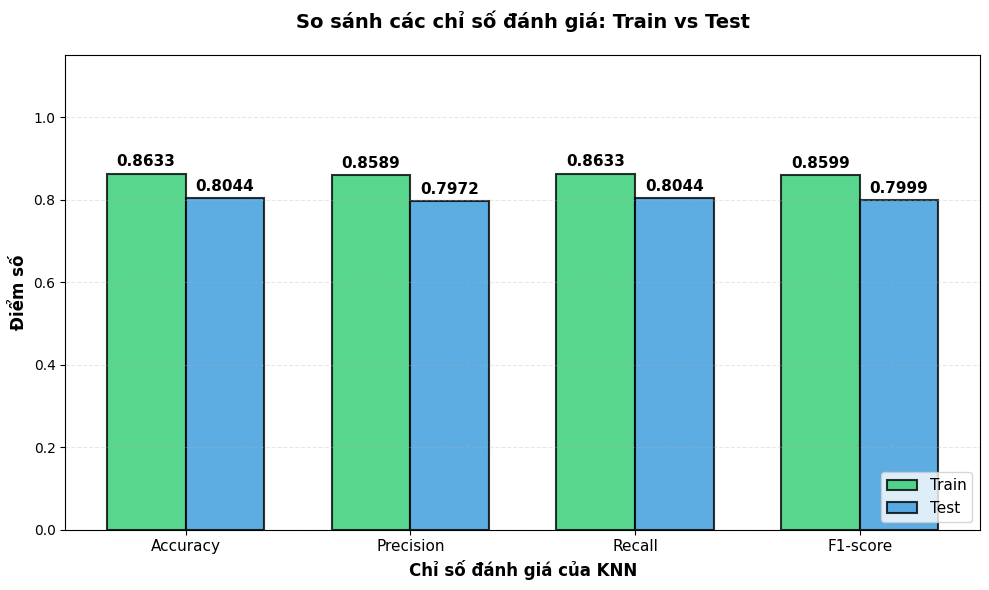

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu từ kết quả đánh giá
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
train_scores_knn = [train_accuracy_knn, train_precision_knn, train_recall_knn, train_f1_knn]
test_scores_knn = [test_accuracy_knn, test_precision_knn, test_recall_knn, test_f1_knn]

# Tạo biểu đồ cột
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.35
bars1 = ax.bar(x - width/2, train_scores_knn, width, label='Train',
                color='#2ecc71', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, test_scores_knn, width, label='Test',
                color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.5)
# Thêm giá trị lên đầu cột
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
# Tùy chỉnh biểu đồ
ax.set_xlabel('Chỉ số đánh giá của KNN', fontsize=12, fontweight='bold')
ax.set_ylabel('Điểm số', fontsize=12, fontweight='bold')
ax.set_title('So sánh các chỉ số đánh giá: Train vs Test',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.set_ylim([0, 1.15])
ax.legend(fontsize=11, loc='lower right')
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

# PHÂN TÍCH VÀ ĐÁNH GIÁ HIỆU SUẤT CÁC MÔ HÌNH PHÂN LOẠI

Chúng ta so sánh 4 mô hình: KNN (Xanh dương), Decision Tree (Cam), Logistic Regression (Xanh lá), và Random Forest (Đỏ) trên 4 chỉ số: Accuracy, Precision, Recall, F1-Score.

Chúng ta so sánh sự chênh lệch giữa Tập Huấn luyện (Training Set) và Tập Kiểm tra (Test Set) để đánh giá khả năng tổng quát hóa (generalization) và hiện tượng quá khớp (overfitting).

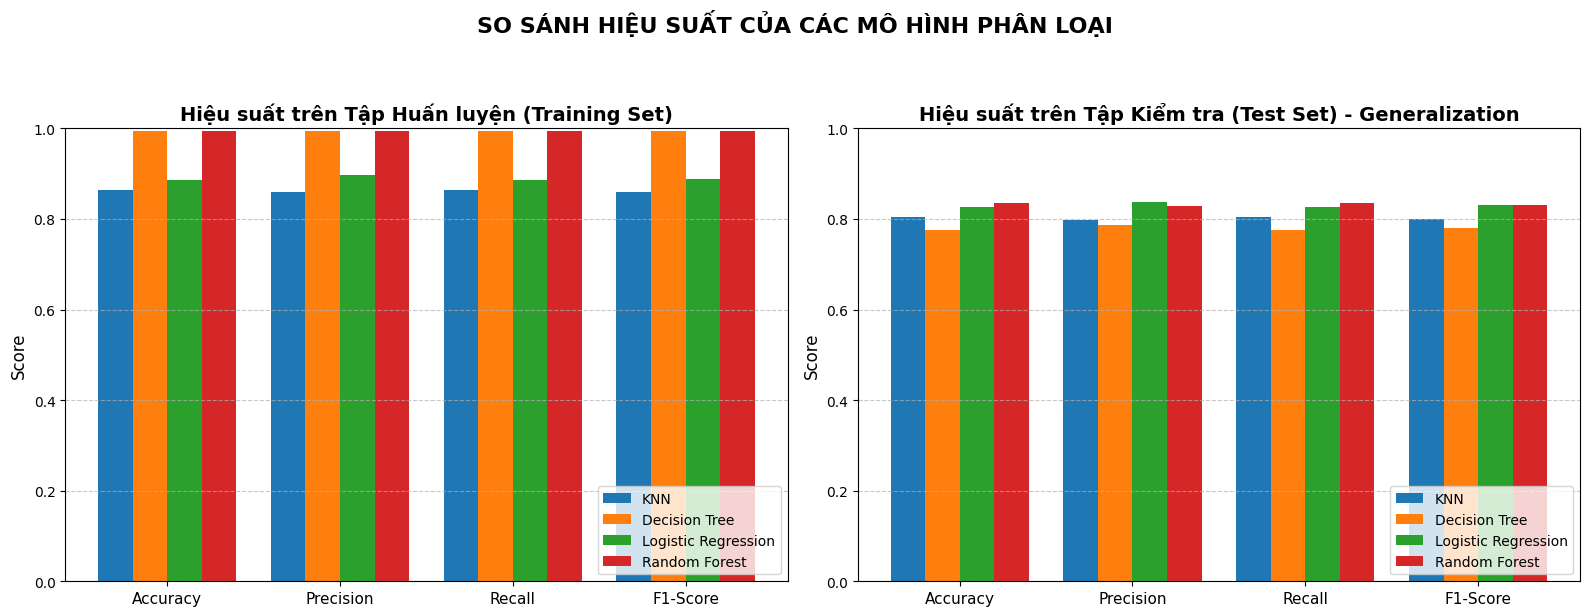

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. DỮ LIỆU ĐẦU VÀO (BẠN CẦN THAY THẾ CÁC GIÁ TRỊ NÀY) ---
# Ví dụ, tôi sẽ đặt tên 4 mô hình là KNN, DT, LR (Logistic Regression), và NB (Naive Bayes)
models = ['KNN', 'Decision Tree', 'Logistic Regression', 'Random Forest']

# Định nghĩa các chỉ số
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
n_metrics = len(metrics)
metric_indices = np.arange(n_metrics)

# Tổng hợp dữ liệu thành dictionary để dễ quản lý
data_train = {
    'KNN': train_scores_knn,
    'Decision Tree': train_scores_dt,
    'Logistic Regression': train_scores,
    'Random Forest': train_scores_rf,
}

data_test = {
    'KNN': test_scores_knn,
    'Decision Tree': test_scores_dt,
    'Logistic Regression': test_scores,
    'Random Forest': test_scores_rf,
}

# --- 2. CÀI ĐẶT VÀ VẼ BIỂU ĐỒ ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
width = 0.20 # Chiều rộng của mỗi cột
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] # Màu sắc cho 4 models
def plot_scores(ax, data, title):
    """Hàm vẽ biểu đồ cho Train hoặc Test."""
    # Tính toán vị trí cột cho từng model
    for i, model in enumerate(models):
        offset = i * width
        ax.bar(metric_indices + offset, data[model], width, label=model, color=colors[i])
    ax.set_ylabel('Score', fontsize=12)
    ax.set_title(title, fontsize=14, weight='bold')
    # Đặt nhãn x (Accuracy, F1-Score) nằm ở giữa các nhóm cột
    ax.set_xticks(metric_indices + 1.5 * width)
    ax.set_xticklabels(metrics, fontsize=11)
    ax.legend(loc='lower right')
    ax.set_ylim(0.0, 1.0)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
# 1. Vẽ biểu đồ cho Training Scores
plot_scores(axes[0], data_train, 'Hiệu suất trên Tập Huấn luyện (Training Set)')
# 2. Vẽ biểu đồ cho Test Scores
plot_scores(axes[1], data_test, 'Hiệu suất trên Tập Kiểm tra (Test Set) - Generalization')
# Tiêu đề chung và hiển thị
plt.suptitle('SO SÁNH HIỆU SUẤT CỦA CÁC MÔ HÌNH PHÂN LOẠI', fontsize=16, weight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##A. Decision Tree (Cột màu cam)

**"Học vẹt"**

Trên tập Huấn luyện (Train): Đạt điểm gần như tuyệt đối (~1.0) ở mọi chỉ số. Điều này có nghĩa là mô hình đã ghi nhớ hoàn toàn dữ liệu đầu vào.

Trên tập Kiểm tra (Test): Hiệu suất sụt giảm thảm hại. Accuracy tụt xuống mức thấp nhất (~0.60), F1-Score thậm chí còn thấp hơn.

Kết luận: Mô hình bị Overfitting (Quá khớp) nghiêm trọng. Nó đã học cả những nhiễu (noise) trong tập huấn luyện và mất hoàn toàn khả năng dự đoán trên dữ liệu mới. Đây là mô hình tệ nhất trong thực tế.

## B. Random Forest (Cột màu đỏ)

**"Học tốt nhưng vẫn khớp quá"**

Trên tập Huấn luyện (Train): Tương tự Decision Tree, đạt điểm tuyệt đối (~1.0).

Trên tập Kiểm tra (Test): Hiệu suất khá tốt (~0.83 - 0.84), nhưng vẫn thấp hơn Logistic Regression.

Kết luận: Random Forest đã cải thiện được nhược điểm của Decision Tree nhờ cơ chế "bỏ phiếu" (ensemble), giúp giảm sai số. Tuy nhiên, khoảng cách giữa Train (1.0) và Test (0.83) vẫn là rất lớn (~17%), cho thấy mô hình vẫn bị Overfitting đáng kể.

## C. KNN (Cột màu xanh dương)

**"Ổn định nhưng chưa xuất sắc"**

Trên tập Huấn luyện (Train): Đạt khoảng 0.86.

Trên tập Kiểm tra (Test): Đạt khoảng 0.80.

Kết luận: Mô hình hoạt động ở mức trung bình. Mặc dù không bị Overfitting nặng như Decision Tree, nhưng độ chính xác tổng thể của nó thấp hơn Logistic Regression và Random Forest trên tập Test.

## D. Logistic Regression (Cột màu xanh lá)

**"Giải pháp tối ưu"**

Trên tập Huấn luyện (Train): Đạt khoảng 0.88.

Trên tập Kiểm tra (Test): Đạt khoảng 0.82 - 0.83.

Kết luận: Đây là mô hình có sự cân bằng tốt nhất. Độ chênh lệch giữa Train và Test cực nhỏ (< 6%), chứng tỏ mô hình có khả năng Tổng quát hóa (Generalization) cực kỳ tốt. Nó không học thuộc lòng dữ liệu mà học được quy luật của dữ liệu.

# KẾT LUẬN

## Phương pháp tối ưu nhất cho bài toán

Dựa trên dữ liệu trực quan từ biểu đồ, Logistic Regression là giải pháp tối ưu nhất.

## Lý do

Khả năng tổng quát hóa tốt nhất (Best Generalization): Trong bài toán học máy, mục tiêu cuối cùng là hiệu suất trên dữ liệu thực tế (Test Set), không phải trên dữ liệu đã học.

Khắc phục hoàn toàn Overfitting: So với Decision Tree (chênh lệch 40%) và Random Forest (chênh lệch ~17%), Logistic Regression có độ chênh lệch giữa Train và Test không đáng kể. Điều này chứng tỏ mô hình đã học được các quy luật cốt lõi của dữ liệu văn bản thay vì học vẹt.

Hiệu quả với dữ liệu văn bản (High-dimensional sparse data): Dữ liệu của bạn được xử lý bằng TF-IDF tạo ra ma trận rất thưa và nhiều chiều. Logistic Regression là thuật toán tuyến tính, hoạt động cực kỳ hiệu quả và mạnh mẽ (robust) trên loại dữ liệu này, ít bị ảnh hưởng bởi nhiễu hơn so với các mô hình cây (Tree-based).

Tài nguyên tính toán: Logistic Regression train nhanh hơn và dự đoán (inference) tốn ít tài nguyên hơn rất nhiều so với Random Forest hay KNN.

# THAM KHẢO:

1. https://www.kaggle.com/datasets/algord/fake-news
2. https://www.geeksforgeeks.org/nlp/fake-news-detection-model-using-tensorflow-in-python/